## Setup

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the Data

In [39]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_dev.csv
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/tamil_offensive_full_train.csv


--2023-10-18 13:21:32--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217900 (213K) [text/plain]
Saving to: ‚ÄòTest.csv.1‚Äô

Test.csv.1          100%[===================>] 212.79K  --.-KB/s    in 0.04s   

2023-10-18 13:21:33 (5.34 MB/s) - ‚ÄòTest.csv.1‚Äô saved [217900/217900]

--2023-10-18 13:21:33--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [40]:
train_set = pd.read_csv("/content/train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv("/content/Test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)
fire_train_set = pd.read_csv("/content/tamil_offensive_full_train.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")

fire_test_set = pd.read_csv("/content/tamil_offensive_full_dev.csv",
                   names=["text","category"],
                   encoding = "utf-8",
                   engine = "python")



In [41]:
print("Train Dataset")
print(train_set.head(10))
print("\nInfo of Train Dataset\n")
print(train_set.info())

Train Dataset
      id                                               text category
0   tam1  ‡Æ§‡Æø‡Æ∞‡ØÅ‡ÆÆ‡Æ≤‡Øà ‡Æ®‡Ææ‡ÆØ‡Æï‡Øç‡Æï‡Æ∞‡Øç ‡Æ™‡Øá‡Æ∞‡Æµ‡Øà ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ±...      NOT
1   tam2  ‡Æá‡Æ®‡Øç‡Æ§ ‡Æü‡Øç‡Æ∞‡ØÜ‡ÆØ‡Øç‡Æ≤‡Æ∞‡Øç ‡Æï‡ØÇ‡Æü ‡Æ™‡Ææ‡Æ∞‡Øç‡Æï‡Øç‡Æï‡Æø‡Æ± ‡ÆÆ‡Ææ‡Æ§‡Æø‡Æ∞‡Æø ‡Æá‡Æ≤‡Øç‡Æ≤‡Øà.. ‡Æá‡Æ§...      OFF
2   tam3  ‡ÆÆ‡Øà‡Æö‡ØÇ‡Æ∞‡ØÅ ‡Æö‡ØÜ‡Æü‡Øç‡Æü‡Æø‡ÆØ‡Ææ‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÇ‡Æï‡Æ§‡Øç‡Æ§‡Æø‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æá‡Æ™‡Øç‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ...      NOT
3   tam4  ‡ÆÆ‡Øä‡Æ§‡Øç‡Æ§ ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡ØÅ‡ÆÆ‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æö‡Ææ‡Æ§‡Æø‡Æï‡Øç‡Æï‡ØÅ ‡Æé‡Æ§‡Æø‡Æ∞‡Ææ ‡Æ®‡Æø‡Æï‡Øç‡Æï‡ØÅ‡Æ§‡ØÅ.......      OFF
4   tam5                     only for ‡Æµ‡Æø‡Æú‡ÆØ‡Øç ‡Æö‡Øá‡Æ§‡ØÅ‡Æ™‡Æ§‡Æø and STR      NOT
5   tam6        ‡Æâ‡Æ£‡ÆÆ‡Øà‡ÆØ‡Ææ‡Æµ‡Øá ‡Æá‡Æ§‡ØÅ ‡Æö‡Øà‡Æï‡Øç‡Æï‡Øã ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æ§‡Ææ‡Æ©‡Øç ‡Æí‡Æ©‡Øç‡Æ©‡ØÅ‡ÆÆ‡Øá ‡Æ™‡ØÅ‡Æ∞‡Æø‡Æ≤      OFF
6   tam7  ‡ÆÆ‡ØÅ‡Æ§‡Øç‡Æ§‡Øà‡ÆØ‡Ææ ‡ÆÖ‡Æ£‡Øç‡Æ£‡Æ©‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ§‡Æø ‡Æö‡Ææ‡Æ

In [42]:
print("Tset Dataset")
print(test_set.head(10))
print("\nInfo of Test Dataset\n")
print(test_set.info())

Tset Dataset
            id                                               text category
0   tam_test_1  ‡Æ§‡Æ≤‡Øà‡Æµ‡Ææ STR ‡Æá‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡Æ§‡Ææ‡Æ©‡Øç ‡Æï‡Æ§‡ØÅ‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øã‡ÆÆ‡Øç ‡ÆÆ‡Ææ‡Æ∏‡Øç ‡Æ§‡Æ≤‡Øà‡Æµ‡Ææ t...      NOT
1   tam_test_2  ‡Æ®‡Ææ‡ÆØ‡ØÅ‡Æü‡ØÅ ‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ§‡Æø‡Æ∞‡Øà‡Æ™‡Øç‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ± ‡Æµ‡Ææ...      NOT
2   tam_test_3                     ‡Æ§‡Æø‡Æ≤‡Øç‡Æ≤‡Ææ‡Æ©‡Ææ ‡ÆÆ‡ØÅ‡ÆØ‡Æ±‡Øç‡Æö‡Æø  ‡Æ§‡Æû‡Øç‡Æö‡Øà ‡Æï‡Øã‡Æ©‡Ææ‡Æ∞‡Øç      NOT
3   tam_test_4  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æ§‡ØÅ‡Æï‡Æø‡Æ≤‡ØÅ‡Æ±‡Æø‡Æ§‡Øç‡Æ§ ‡Æ™‡Øã‡Æ§‡ØÅ ‡Æï‡Ææ‡Æ§‡Øç‡Æ§ ‡Æï‡Æ£‡Øç‡Æ£‡Æ©‡Æø‡Æ©‡Øç ‡ÆØ‡Ææ...      NOT
4   tam_test_5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æ§‡Æø‡ÆØ‡Øá‡Æü‡Øç‡Æü‡Æ∞‡Øç‡Æ≤‡Øá ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ 35 ‡Æµ‡Æ∞‡ØÅ‡Æ∑‡ÆÆ‡Ææ‡Æö‡Øç‡Æö‡ØÅ! ...      NOT
5   tam_test_6  ‡Æï‡Øä‡Æô‡Øç‡Æï‡ØÅ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æï‡Æµ‡ØÅ‡Æ£‡Øç‡Æü‡Æ∞‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø...      NOT
6   tam_test_7  ‡Æ§‡

In [43]:
print("Fire Train Dataset")
print(fire_train_set.head(10))
print("\nInfo of Train Dataset\n")
print(fire_train_set.info())

Fire Train Dataset
                                                text       category
0                  movie vara level la Erika poguthu  Not_offensive
1  I love Ajith Kumar Vivegam movie inki mjy bht ...      not-Tamil
2          Padam nalla comedy padama irukum polaye..  Not_offensive
3  karthick subburaj anne .... intha padam vetri ...  Not_offensive
4  ‡Æï‡Æµ‡ØÅ‡Æ£‡Øç‡Æü‡Æ∞‡Øç ‡Æ§‡Øá‡Æµ‡Æ∞‡Øç.‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ± ‡Æµ‡Ææ‡Æ¥‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡Æ≥‡Øç ü¶Å  Not_offensive
5  ippo intha trailer ah parkuravana oru like pod...  Not_offensive
6  En thalaivan yogi babu irukkaar. Padam vera le...  Not_offensive
7         Nerkonda parvai...  Sema sema sema trailer  Not_offensive
8     ‡Æè‡ÆØ‡Øç ‡Æá‡Æ§‡ØÅ 96 ‡ÆØ‡Ææ‡Æ∞‡Øç ‡Æè‡ÆÆ‡Ææ‡Æ§‡Øç‡Æ§‡Æ±‡ØÄ‡Æô‡Øç‡Æï? ‡Æö‡ØÜ‡ÆÆ ‡Æ™‡Æø‡Æ©‡Øç‡Æ©‡Æø‡Æü‡Øç‡Æü‡ØÄ‡Æô‡Øç‡Æï  Not_offensive
9  ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æï‡Æ£‡Øç‡Æü‡Æø‡Æ™‡Øç‡Æ™‡Ææ‡Æï ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ± ‡Æµ‡Øá‡Æ£‡Øç‡Æü‡ØÅ‡ÆÆ‡Øç ‡Æö‡ØÜ‡ÆÆ‡Øç‡ÆÆ vara...  Not_offensive


In [44]:
fire_train_set.head(10)

text       category
0                  movie vara level la Erika poguthu  Not_offensive
1  I love Ajith Kumar Vivegam movie inki mjy bht ...      not-Tamil
2          Padam nalla comedy padama irukum polaye..  Not_offensive
3  karthick subburaj anne .... intha padam vetri ...  Not_offensive
4  ‡Æï‡Æµ‡ØÅ‡Æ£‡Øç‡Æü‡Æ∞‡Øç ‡Æ§‡Øá‡Æµ‡Æ∞‡Øç.‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ± ‡Æµ‡Ææ‡Æ¥‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æï‡Øç‡Æï‡Æ≥‡Øç ü¶Å  Not_offensive
5  ippo intha trailer ah parkuravana oru like pod...  Not_offensive
6  En thalaivan yogi babu irukkaar. Padam vera le...  Not_offensive
7         Nerkonda parvai...  Sema sema sema trailer  Not_offensive
8     ‡Æè‡ÆØ‡Øç ‡Æá‡Æ§‡ØÅ 96 ‡ÆØ‡Ææ‡Æ∞‡Øç ‡Æè‡ÆÆ‡Ææ‡Æ§‡Øç‡Æ§‡Æ±‡ØÄ‡Æô‡Øç‡Æï? ‡Æö‡ØÜ‡ÆÆ ‡Æ™‡Æø‡Æ©‡Øç‡Æ©‡Æø‡Æü‡Øç‡Æü‡ØÄ‡Æô‡Øç‡Æï  Not_offensive
9  ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æï‡Æ£‡Øç‡Æü‡Æø‡Æ™‡Øç‡Æ™‡Ææ‡Æï ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø ‡Æ™‡ØÜ‡Æ± ‡Æµ‡Øá‡Æ£‡Øç‡Æü‡ØÅ‡ÆÆ‡Øç ‡Æö‡ØÜ‡ÆÆ‡Øç‡ÆÆ vara...  Not_offensive

In [45]:
print("Fire Tset Dataset")
print(fire_test_set.head(10))
print("\nInfo of Test Dataset\n")
print(fire_test_set.info())

Fire Tset Dataset
                                                text  \
0                  Handsome hunk  keri vaa thalaivaa   
1  ‡Æ§‡ØÜ‡Æ©‡Øç‡Æï‡Ææ‡Æö‡Æø ‡ÆÆ‡Ææ‡Æµ‡Æü‡Øç‡Æü‡ÆÆ‡Øç ‡Æ®‡Ææ‡Æü‡Ææ‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æµ‡Ææ‡Æ¥‡Øç...   
2  je vous aime bravo pour clip de merde que j √©c...   
3  ‡Æö‡Æø‡Æ±‡Æ™‡Øç‡Æ™‡ØÅ..... ‡ÆÆ‡Øá‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æá‡Æ§‡ØÅ ‡Æ™‡Øã‡Æ©‡Øç‡Æ± ‡Æ™‡Æü‡Øà‡Æ™‡Øç‡Æ™‡ØÅ‡Æï‡Æ≥‡Øç ‡ÆÆ‡Æø‡Æï ‡ÆÖ...   
4                Vera level BGM .. semma  trailer. ü§û   
5  ‡Æé‡Æ©‡Øç‡Æ©‡Æü‡Ææ ‡Æ™‡Æ£‡Øç‡Æ£‡Æø ‡Æµ‡Æö‡Øç‡Æö‡Æø‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÄ‡Æô‡Øç‡Æï ?!!!! ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Ææ‡Æµ ...   
6  #kaappaan is gonna be a massive hit ,#suriya #...   
7             250k likes to go.....Yaralam waiting ü•∞   
8  Supar annan trailar semmaya iruku i am waiting...   
9                         Maranam we Luv u Surya ann   

                          category  
0                    Not_offensive  
1                    Not_offensive  
2                        

In [46]:
fire_test_set["category"].unique()
fire_test_set.drop(fire_test_set[ (fire_test_set['category'] == 'not-Tamil')].index, inplace=True)
fire_test_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_test_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)

# train
fire_train_set["category"].unique()
fire_train_set.drop(fire_train_set[ (fire_train_set['category'] == 'not-Tamil')].index, inplace=True)
fire_train_set["category"].replace("Not_offensive","NOT",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Individual","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Untargetede","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Other","OFF",inplace=True)
fire_train_set["category"].replace("Offensive_Targeted_Insult_Group","OFF",inplace=True)




In [47]:
fire_test_set["category"].unique()

array(['NOT', 'OFF'], dtype=object)

In [48]:
fire_train_set["category"].unique()

array(['NOT', 'OFF'], dtype=object)

In [49]:
train_set = train_set.sample(frac=1, random_state=1).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_train_set = fire_train_set.sample(frac=1, random_state=1).reset_index(drop=True)
fire_test_set = fire_test_set.sample(frac=1, random_state=1).reset_index(drop=True)
data = pd.concat([train_set, test_set,fire_train_set,fire_test_set], ignore_index=True)
data = data.drop(columns=['id'])
data.drop_duplicates(subset=['text'], inplace=True)

In [50]:
print("Full Dataset")
print(data.head(10))
print("\nInfo of Full Dataset\n")
print(data.info())



Full Dataset
                                                text category
0  ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç ‡Æü‡Ææ ‡ÆÆ‡Ææ‡Æ™‡Øç‡Æ≥ ‡Æµ‡Øá‡Æ§‡Ææ‡Æ∞‡Æ£‡Øç‡ÆØ‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤‡Øá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ.. ‡Æ§‡Æ∞‡ÆÆ‡Ææ‡Æ© ...      NOT
1  ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF
2  ‡ÆÖ‡Æ∞‡ØÅ‡ÆÆ‡Øà ‡Æé‡Æµ‡Æ§‡Øä‡Æü‡Øç‡Æü‡Ææ‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æü‡Æø‡Æö‡Øç‡Æö‡Ææ ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æø ‡ÆÖ...      OFF
3  ‡Æé‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æï‡ØÅ‡Æ≤ ‡Æ§‡ØÜ‡ÆØ‡Øç‡Æµ‡ÆÆ‡Øç  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Æ©‡Øç ‡ÆÖ‡Æ∞...      NOT
4  trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT
5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT
6  ‡Æµ‡Æø‡Æ¥‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡Æ£‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡Æ™‡Æ∞‡ØÅ‡Æµ‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øá ‡Æ™‡ØÜ‡

In [51]:
data['category'].value_counts()

NOT    28833
OFF     9381
Name: category, dtype: int64

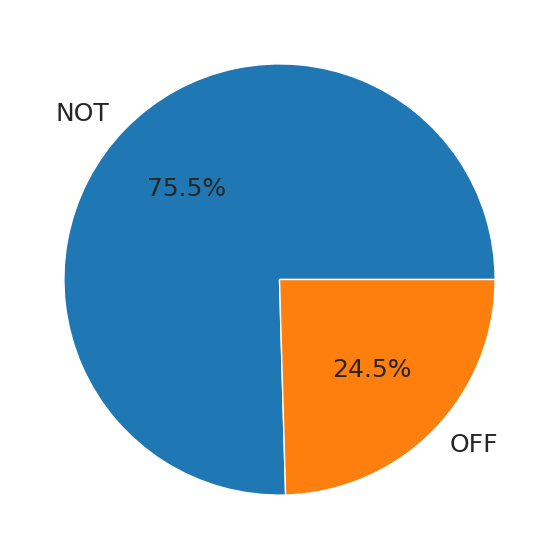

In [52]:
plt.pie(data['category'].value_counts(), labels=data['category'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Exploratory Data Analysis

In [53]:
lenght = len(data['text'][0])
print(f'Length of a sample commands: {lenght}')

Length of a sample commands: 72


In [54]:
data['Length'] = data['text'].str.len()
data.head(10)

text category  Length
0  ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç ‡Æü‡Ææ ‡ÆÆ‡Ææ‡Æ™‡Øç‡Æ≥ ‡Æµ‡Øá‡Æ§‡Ææ‡Æ∞‡Æ£‡Øç‡ÆØ‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤‡Øá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ.. ‡Æ§‡Æ∞‡ÆÆ‡Ææ‡Æ© ...      NOT      72
1  ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF      80
2  ‡ÆÖ‡Æ∞‡ØÅ‡ÆÆ‡Øà ‡Æé‡Æµ‡Æ§‡Øä‡Æü‡Øç‡Æü‡Ææ‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æü‡Æø‡Æö‡Øç‡Æö‡Ææ ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æø ‡ÆÖ...      OFF      68
3  ‡Æé‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æï‡ØÅ‡Æ≤ ‡Æ§‡ØÜ‡ÆØ‡Øç‡Æµ‡ÆÆ‡Øç  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Æ©‡Øç ‡ÆÖ‡Æ∞...      NOT      91
4  trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT      76
5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT      95
6  ‡Æµ‡Æø‡Æ¥‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡Æ£‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡Æ™‡Æ∞‡ØÅ‡Æµ‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øá ‡Æ™‡ØÜ‡Æ±‡Øç‡Æ±...      NOT     209
7  ‡Æá‡Æ§‡Øç‡Æ§‡Æ© ‡Æ™‡Øá‡Æ∞‡Ææ? ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡Æ®‡Ææ‡Æ≥‡Ææ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æì‡Æ¥‡Æø‡Æû‡Øç‡Æö‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞...      OFF      55
8  ‡Æê‡Æô‡Øç‡Æï‡ØÅ‡Æ≤‡Æ§‡Øç‡Æ§‡Øã‡Æ∞‡Øç  ‡Æµ‡Æø‡Æ∏‡Øç‡Æµ‡Æï‡ØÅ‡Æ≤‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø‡ÆØ‡Æü...      NOT      62
9  1:33 ‡Æ≤ ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡ÆÖ‡Æ±‡Øç‡Æ™‡ØÅ‡Æ§‡Æô‡Øç‡Æï‡Æ≥‡Øç  ‡ÆÜ‡Æπ‡Ææ ‡Æ©‡ØÅ ‡Æö‡Øä‡Æ©‡Øç‡Æ©‡Ææ ‡ÆÖ‡Æ§‡ØÅ ...      NOT      76

#### **Word Count**: Number of words in a review

In [55]:
word_count = data['text'][0].split()
print(f'Word count in a sample commands: {len(word_count)}')

Word count in a sample commands: 8


In [56]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [57]:
data['Word_count'] = data['text'].apply(word_count)
data.head(10)

text category  Length  \
0  ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç ‡Æü‡Ææ ‡ÆÆ‡Ææ‡Æ™‡Øç‡Æ≥ ‡Æµ‡Øá‡Æ§‡Ææ‡Æ∞‡Æ£‡Øç‡ÆØ‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤‡Øá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ.. ‡Æ§‡Æ∞‡ÆÆ‡Ææ‡Æ© ...      NOT      72   
1  ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF      80   
2  ‡ÆÖ‡Æ∞‡ØÅ‡ÆÆ‡Øà ‡Æé‡Æµ‡Æ§‡Øä‡Æü‡Øç‡Æü‡Ææ‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æü‡Æø‡Æö‡Øç‡Æö‡Ææ ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æø ‡ÆÖ...      OFF      68   
3  ‡Æé‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æï‡ØÅ‡Æ≤ ‡Æ§‡ØÜ‡ÆØ‡Øç‡Æµ‡ÆÆ‡Øç  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Æ©‡Øç ‡ÆÖ‡Æ∞...      NOT      91   
4  trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT      76   
5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT      95   
6  ‡Æµ‡Æø‡Æ¥‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡Æ£‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡Æ™‡Æ∞‡ØÅ‡Æµ‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øá ‡Æ™‡ØÜ‡Æ±‡Øç‡Æ±...      NOT     209   
7  ‡Æá‡Æ§‡Øç‡Æ§‡Æ© ‡Æ™‡Øá‡Æ∞‡Ææ? ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡Æ®‡Ææ‡Æ≥‡Ææ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æì‡Æ¥‡Æø‡Æû‡Øç‡Æö‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞...      OFF      55   
8  ‡Æê‡Æô‡Øç‡Æï‡ØÅ‡Æ≤‡Æ§‡Øç‡Æ§‡Øã‡Æ∞‡Øç  ‡Æµ‡Æø‡Æ∏‡Øç‡Æµ‡Æï‡ØÅ‡Æ≤‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø‡ÆØ‡Æü...      NOT      62   
9  1:33 ‡Æ≤ ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡ÆÖ‡Æ±‡Øç‡Æ™‡ØÅ‡Æ§‡Æô‡Øç‡Æï‡Æ≥‡Øç  ‡ÆÜ‡Æπ‡Ææ ‡Æ©‡ØÅ ‡Æö‡Øä‡Æ©‡Øç‡Æ©‡Ææ ‡ÆÖ‡Æ§‡ØÅ ...      NOT      76   

   Word_count  
0           8  
1          11  
2           8  
3          12  
4          10  
5          13  
6          20  
7           7  
8           6  
9          13

#### **Mean word length**: Average length of words

In [58]:
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

text category  Length  \
0  ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç ‡Æü‡Ææ ‡ÆÆ‡Ææ‡Æ™‡Øç‡Æ≥ ‡Æµ‡Øá‡Æ§‡Ææ‡Æ∞‡Æ£‡Øç‡ÆØ‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤‡Øá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ.. ‡Æ§‡Æ∞‡ÆÆ‡Ææ‡Æ© ...      NOT      72   
1  ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF      80   
2  ‡ÆÖ‡Æ∞‡ØÅ‡ÆÆ‡Øà ‡Æé‡Æµ‡Æ§‡Øä‡Æü‡Øç‡Æü‡Ææ‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æü‡Æø‡Æö‡Øç‡Æö‡Ææ ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æø ‡ÆÖ...      OFF      68   
3  ‡Æé‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æï‡ØÅ‡Æ≤ ‡Æ§‡ØÜ‡ÆØ‡Øç‡Æµ‡ÆÆ‡Øç  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Æ©‡Øç ‡ÆÖ‡Æ∞...      NOT      91   
4  trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT      76   
5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT      95   
6  ‡Æµ‡Æø‡Æ¥‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡Æ£‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡Æ™‡Æ∞‡ØÅ‡Æµ‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øá ‡Æ™‡ØÜ‡Æ±‡Øç‡Æ±...      NOT     209   
7  ‡Æá‡Æ§‡Øç‡Æ§‡Æ© ‡Æ™‡Øá‡Æ∞‡Ææ? ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡Æ®‡Ææ‡Æ≥‡Ææ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æì‡Æ¥‡Æø‡Æû‡Øç‡Æö‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞...      OFF      55   
8  ‡Æê‡Æô‡Øç‡Æï‡ØÅ‡Æ≤‡Æ§‡Øç‡Æ§‡Øã‡Æ∞‡Øç  ‡Æµ‡Æø‡Æ∏‡Øç‡Æµ‡Æï‡ØÅ‡Æ≤‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø‡ÆØ‡Æü...      NOT      62   
9  1:33 ‡Æ≤ ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡ÆÖ‡Æ±‡Øç‡Æ™‡ØÅ‡Æ§‡Æô‡Øç‡Æï‡Æ≥‡Øç  ‡ÆÜ‡Æπ‡Ææ ‡Æ©‡ØÅ ‡Æö‡Øä‡Æ©‡Øç‡Æ©‡Ææ ‡ÆÖ‡Æ§‡ØÅ ...      NOT      76   

   Word_count  mean_word_length  
0           8          8.125000  
1          11          6.363636  
2           8          7.625000  
3          12          6.583333  
4          10          6.500000  
5          13          6.384615  
6          20          9.500000  
7           7          7.000000  
8           6          9.333333  
9          13          4.846154

#### **Mean sentence length**: Average length of the sentences in the review

In [59]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['text'][0])])

72.0

In [60]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

text category  Length  \
0  ‡Æµ‡Æ£‡Æï‡Øç‡Æï‡ÆÆ‡Øç ‡Æü‡Ææ ‡ÆÆ‡Ææ‡Æ™‡Øç‡Æ≥ ‡Æµ‡Øá‡Æ§‡Ææ‡Æ∞‡Æ£‡Øç‡ÆØ‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤‡Øá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ.. ‡Æ§‡Æ∞‡ÆÆ‡Ææ‡Æ© ...      NOT      72   
1  ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF      80   
2  ‡ÆÖ‡Æ∞‡ØÅ‡ÆÆ‡Øà ‡Æé‡Æµ‡Æ§‡Øä‡Æü‡Øç‡Æü‡Ææ‡Æ≤‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æü‡Æø‡Æö‡Øç‡Æö‡Ææ ‡Æ§‡Æø‡Æ∞‡ØÅ‡Æ™‡Øç‡Æ™‡Æø ‡ÆÖ...      OFF      68   
3  ‡Æé‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æö‡Ææ‡Æ§‡Æø‡ÆØ‡Æø‡Æ©‡Øç ‡Æï‡ØÅ‡Æ≤ ‡Æ§‡ØÜ‡ÆØ‡Øç‡Æµ‡ÆÆ‡Øç  ‡Æ§‡Æø‡Æ∞‡Øå‡Æ™‡Æ§‡Æø ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Æ©‡Øç ‡ÆÖ‡Æ∞...      NOT      91   
4  trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT      76   
5  ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT      95   
6  ‡Æµ‡Æø‡Æ¥‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡Æ£‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡Æ™‡Æ∞‡ØÅ‡Æµ‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Øá ‡Æ™‡ØÜ‡Æ±‡Øç‡Æ±...      NOT     209   
7  ‡Æá‡Æ§‡Øç‡Æ§‡Æ© ‡Æ™‡Øá‡Æ∞‡Ææ? ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡Æ®‡Ææ‡Æ≥‡Ææ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æì‡Æ¥‡Æø‡Æû‡Øç‡Æö‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞...      OFF      55   
8  ‡Æê‡Æô‡Øç‡Æï‡ØÅ‡Æ≤‡Æ§‡Øç‡Æ§‡Øã‡Æ∞‡Øç  ‡Æµ‡Æø‡Æ∏‡Øç‡Æµ‡Æï‡ØÅ‡Æ≤‡ÆÆ‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ™‡Ææ‡Æï ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡ØÜ‡Æ±‡Øç‡Æ±‡Æø‡ÆØ‡Æü...      NOT      62   
9  1:33 ‡Æ≤ ‡Æá‡Æµ‡Øç‡Æµ‡Æ≥‡Æµ‡ØÅ ‡ÆÖ‡Æ±‡Øç‡Æ™‡ØÅ‡Æ§‡Æô‡Øç‡Æï‡Æ≥‡Øç  ‡ÆÜ‡Æπ‡Ææ ‡Æ©‡ØÅ ‡Æö‡Øä‡Æ©‡Øç‡Æ©‡Ææ ‡ÆÖ‡Æ§‡ØÅ ...      NOT      76   

   Word_count  mean_word_length  mean_sent_length  
0           8          8.125000              72.0  
1          11          6.363636              80.0  
2           8          7.625000              68.0  
3          12          6.583333              91.0  
4          10          6.500000              76.0  
5          13          6.384615              95.0  
6          20          9.500000             209.0  
7           7          7.000000              27.0  
8           6          9.333333              62.0  
9          13          4.846154              76.0

In [61]:
import re

def contains_english_word(text):
    # Define a regular expression pattern to match English words
    pattern = r'\b[a-zA-Z]+\b'

    # Use re.search to find the first English word in the string
    match = re.search(pattern, text)

    # If a match is found, return True; otherwise, return False
    return bool(match)

# Assuming 'data' is your DataFrame with a 'text' column
data['isenglish'] = data['text'].apply(contains_english_word)


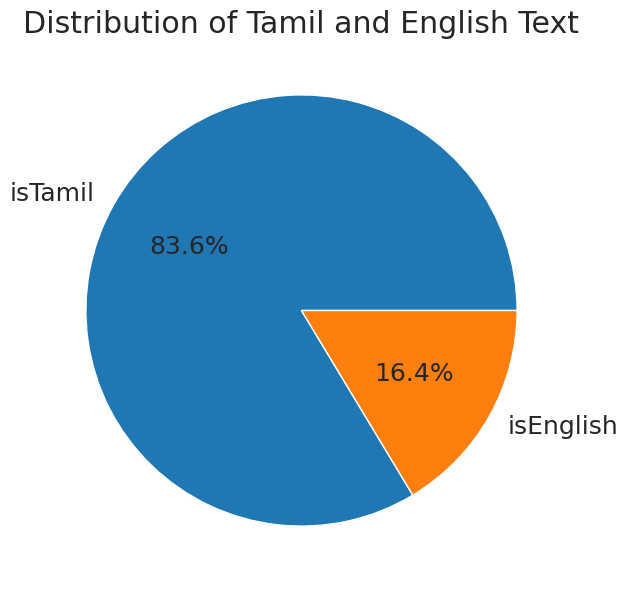

In [62]:
plt.pie(data['isenglish'].value_counts(), labels=["isTamil","isEnglish"], autopct='%1.1f%%')
plt.title('Distribution of Tamil and English Text')
plt.show()

In [63]:
data[data['isenglish']]

text category  Length  \
1      ‡ÆÖ‡Æ™‡Øç‡Æ™ 96 to 2016; ‡Æµ‡Æ∞‡Øà‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Æú‡Æø‡Æ©‡Æø ‡ÆÖ‡Æ∞‡Æö‡Æø‡ÆØ‡Æ≤‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æµ...      OFF      80   
4      trailer ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÜ‡ÆØ‡Øç‡Æ§ ‡Æé‡Æ¥‡ØÅ‡Æ§‡Øç‡Æ§‡ØÅ ‡Æö‡ØÇ‡Æ∞‡Øç‡ÆØ‡Ææ ‡Æû‡Ææ‡Æ™‡Æï‡ÆÆ...      NOT      76   
5      ‡Æ®‡Ææ‡Æ©‡Øç ‡Æö‡Ææ‡Æ∞‡Øç‡Æ®‡Øç‡Æ§ devendira ‡Æï‡ØÅ‡Æ≤ ‡Æµ‡Øá‡Æ≥‡Ææ‡Æ≥‡Æ∞‡Øç ‡Æö‡ÆÆ‡ØÅ‡Æ§‡Ææ‡ÆØ‡ÆÆ‡Øç ‡Æö‡Ææ...      NOT      95   
16     Trailor ‡Æµ‡Øà‡Æ§‡Øç‡Æ§‡ØÅ ‡Æé‡Æ§‡Øà‡ÆØ‡ØÅ‡ÆÆ‡Øç ‡ÆÆ‡ØÅ‡Æü‡Æø‡Æµ‡ØÅ ‡Æö‡ØÜ‡ÆØ‡Øç‡Æ§‡ØÅ ‡Æö‡Æ£‡Øç‡Æü‡Øà ‡Æ™‡Øã‡Æü...      NOT     137   
17         0:06 to 0:10 ‡Æá‡Æ®‡Øç‡Æ§ ‡Æ™‡Æï‡ØÅ‡Æ§‡Æø ‡Æ™‡Øã‡Æ§‡ØÅ‡ÆÆ‡Øç ‡Æ™‡Æü‡ÆÆ‡Øç ‡Æµ‡Øá‡Æ± ‡Æ≤‡ØÜ‡Æµ‡Æ≤‡Øç      NOT      45   
...                                                  ...      ...     ...   
44426             Yov padam vera lvl la hit aaga poguthu      NOT      38   
44427                  Super star fans hit like  waiting      NOT      33   
44428       Seems to be Hindi Film Ek Tha Tiger Remake..      OFF      44   
44429                  Apa idhulla sk van yarum illayada      OFF      33   
44430  Karthi sir welcome to my kadavur village... Tq...      NOT      53   

       Word_count  mean_word_length  mean_sent_length  isenglish  
1              11          6.363636              80.0       True  
4              10          6.500000              76.0       True  
5              13          6.384615              95.0       True  
16             16          7.625000              68.0       True  
17              9          4.111111              45.0       True  
...           ...               ...               ...        ...  
44426           8          3.875000              38.0       True  
44427           6          4.500000              33.0       True  
44428           9          4.000000              44.0       True  
44429           6          4.666667              33.0       True  
44430          10          4.400000              53.0       True  

[31960 rows x 7 columns]

In [64]:
data["text"].isna().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(col):
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col], x=data['category'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    sns.kdeplot(data[data['category'] == 'NOT'][col], label='NOT', shade=True)
    sns.kdeplot(data[data['category'] == 'OFF'][col], label='OFF', shade=True)
    plt.xlabel('')
    plt.ylabel('')

    plt.show()


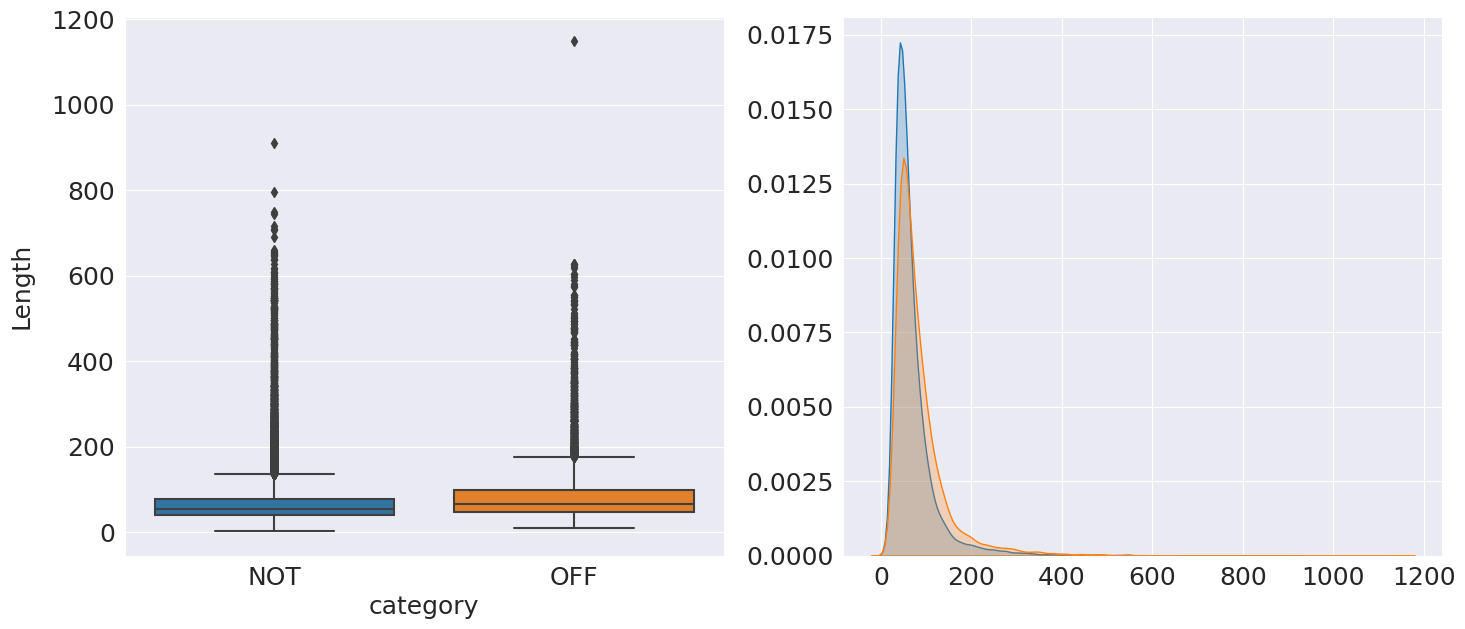

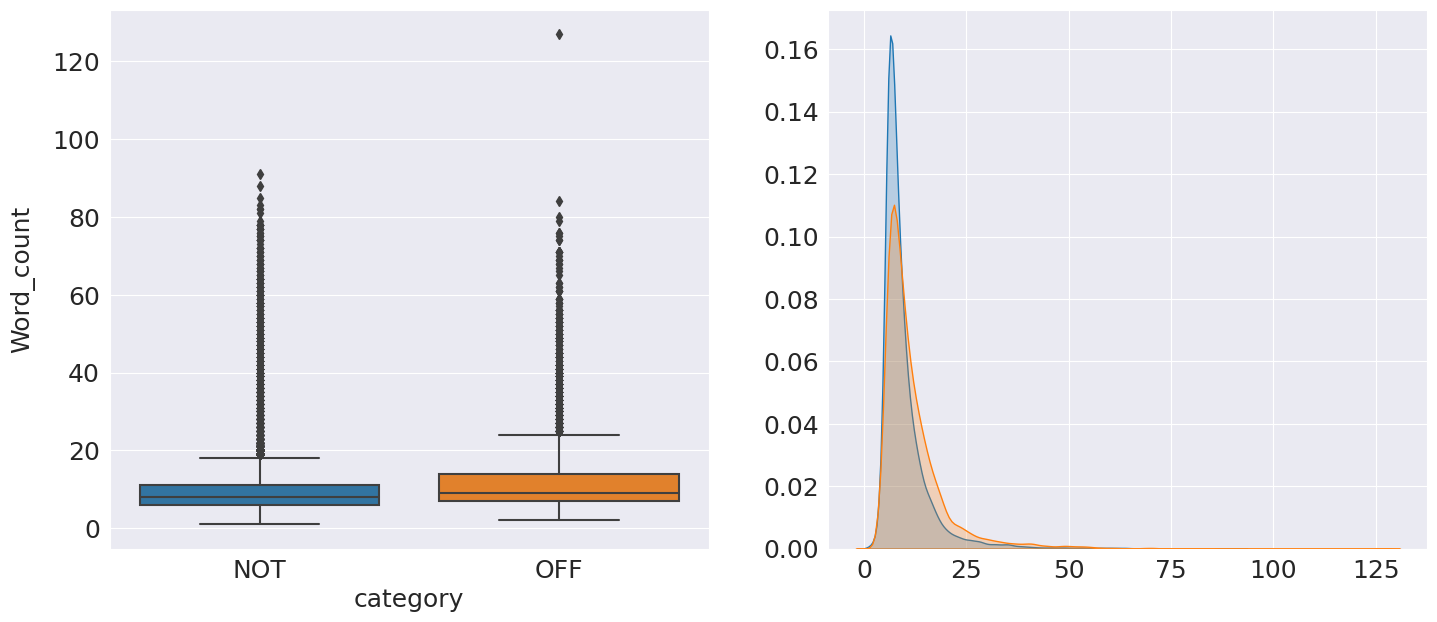

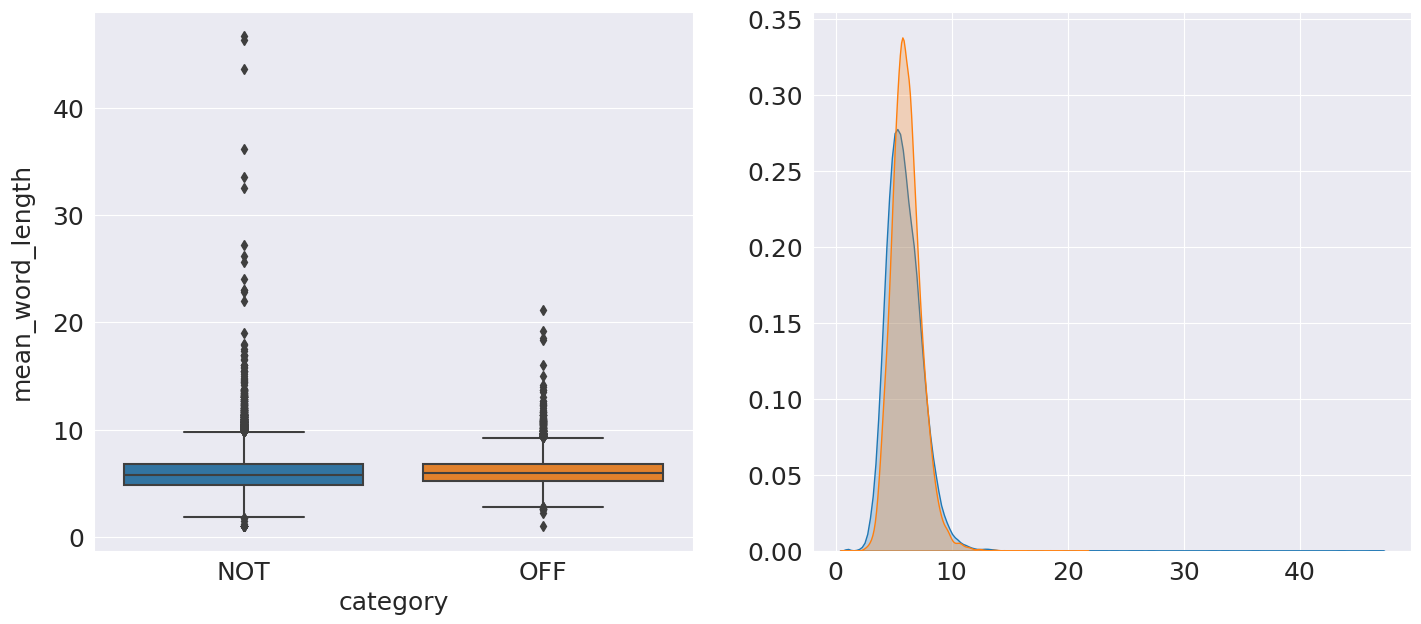

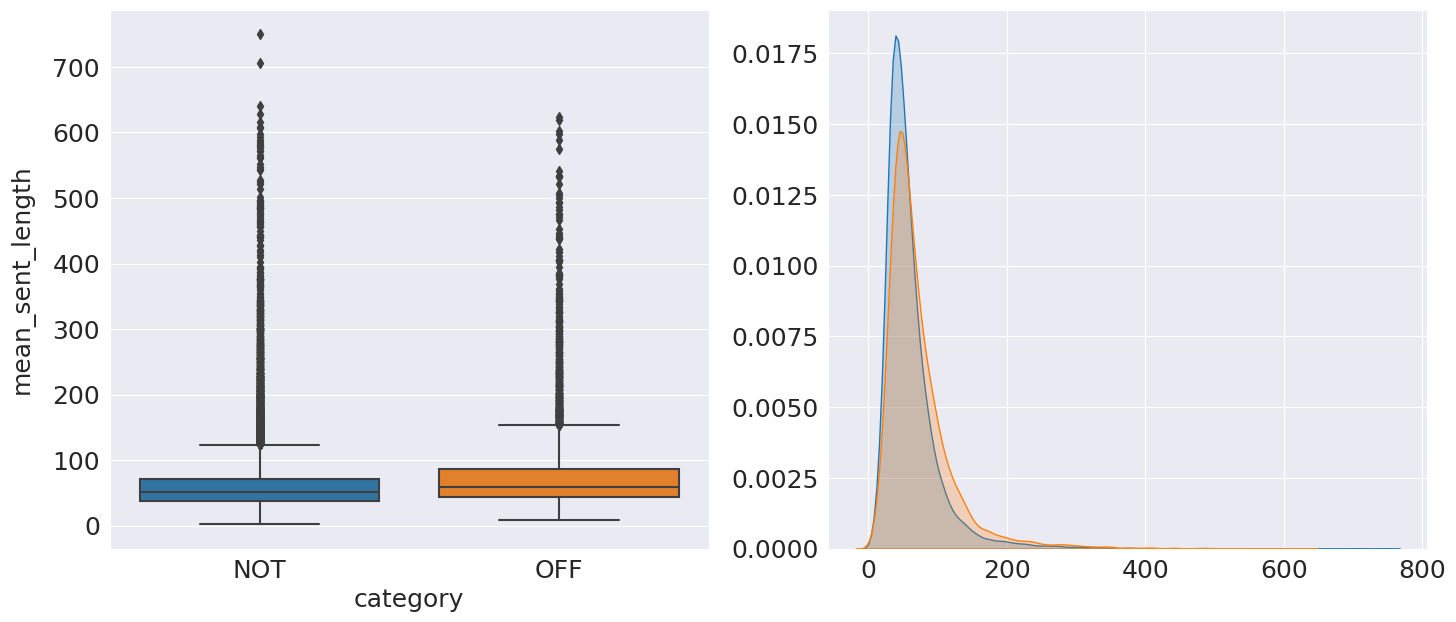

In [ ]:
features = data.columns.tolist()[2:6]

for feature in features:
    visualize(feature)

In [ ]:
df = data.copy()

In [ ]:
# data = data.drop(columns=features)
data.to_csv("Tamil_full_dataset",index=False)

# Translate

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.5/1.5 MB 7.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.4/133.4 kB 15.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.6/53.6 kB 5.8 MB/s eta 0:00:0

In [65]:
!pip install transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.7/7.7 MB 50.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302.0/302.0 kB 31.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.8/3.8 MB 105.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.0/295.0 kB 34.5 MB/s eta 0:00:00


In [69]:
import pandas as pd
import torch
import transformers

# ‡Æ§‡Æ∞‡Æµ‡ØÅ‡Æ§‡Øç‡Æ§‡Æ≥‡Æ§‡Øç‡Æ§‡Øà ‡Æè‡Æ±‡Øç‡Æ±‡Æµ‡ØÅ‡ÆÆ‡Øç
# df = pd.read_csv("dataset.csv")

# ‡ÆÆ‡Øä‡Æ¥‡Æø ‡ÆÆ‡Ææ‡Æ§‡Æø‡Æ∞‡Æø‡ÆØ‡Øà ‡Æè‡Æ±‡Øç‡Æ±‡Æµ‡ØÅ‡ÆÆ‡Øç
model = transformers.AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")
tokenizer = transformers.AutoTokenizer.from_pretrained("facebook/bart-base")




In [70]:

# ‡Æâ‡Æ∞‡Øà ‡ÆÆ‡Øä‡Æ¥‡Æø‡Æ™‡ØÜ‡ÆØ‡Æ∞‡Øç‡Æï‡Øç‡Æï
def translate_to_tamil(text):
    inputs = tokenizer(text, return_tensors="pt").input_ids
    outputs = model.generate(inputs, max_length=1000)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ‡Æ§‡Æ∞‡Æµ‡ØÅ‡Æ§‡Øç‡Æ§‡Æ≥‡Æ§‡Øç‡Æ§‡Øà ‡ÆÆ‡Øä‡Æ¥‡Æø‡Æ™‡ØÜ‡ÆØ‡Æ∞‡Øç‡Æï‡Øç‡Æï
for i in range(len(df)):
    if df.loc[i, "isenglish"] == True:
        df.loc[i, "text"] = translate_to_tamil(df.loc[i, "text"])

# ‡ÆÆ‡Øä‡Æ¥‡Æø‡Æ™‡ØÜ‡ÆØ‡Æ∞‡Øç‡Æï‡Øç‡Æï‡Æ™‡Øç‡Æ™‡Æü‡Øç‡Æü ‡Æ§‡Æ∞‡Æµ‡ØÅ‡Æ§‡Øç‡Æ§‡Æ≥‡Æ§‡Øç‡Æ§‡Øà ‡Æö‡Øá‡ÆÆ‡Æø‡Æï‡Øç‡Æï

Token indices sequence length is longer than the specified maximum sequence length for this model (1075 > 1024). Running this sequence through the model will result in indexing errors


IndexError: ignored

In [ ]:
df.to_csv("translated_dataset.csv")

In [ ]:
from googletrans import Translator
import pandas as pd
from tqdm import tqdm
import re
# Define a function to translate English to Tamil
def translate_to_tamil(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='ta')
    return translated.text

In [ ]:

# Define a function to translate English text in the DataFrame
def translate_dataframe(row):
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    if bool(english_word_pattern.search(row)):
        translated_text = translate_to_tamil(row)
        return translated_text
    return row



In [ ]:
# cudf_df = cudf.DataFrame.from_pandas(df)
# Use tqdm to track progress while applying translation
tqdm.pandas(desc="Translate and Remove duplicates")
df['translate'] = df["text"].progress_apply(translate_dataframe)

Translate and Remove duplicates:   2%|‚ñè         | 874/38214 [02:42<1:55:45,  5.38it/s]


TypeError: ignored

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda --version


--2023-10-18 12:58:55--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103219356 (98M) [application/x-sh]
Saving to: ‚ÄòMiniconda3-latest-Linux-x86_64.sh‚Äô

Miniconda3-latest-L 100%[===================>]  98.44M   134MB/s    in 0.7s    

2023-10-18 12:58:56 (134 MB/s) - ‚ÄòMiniconda3-latest-Linux-x86_64.sh‚Äô saved [103219356/103219356]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!conda install -c rapidsai-nightly -c nvidia -c conda-forge \
-c defaults cuml=21.12 python=3.7


Solving environment: / unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: \ unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - cuml=21.12

Current channels:

  - https://conda.anaconda.org/rapidsai-nightly/linux-64
  - https://conda.anaconda.org/rapidsai-nightly/noarch
  - https://conda.anaconda.org/nvidia/linux-64
  - https://conda.anaconda.org/nvidia/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



In [ ]:
import cudf


ModuleNotFoundError: ignored

In [1]:
pip install transformers

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302.0/302.0 kB 34.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.8/3.8 MB 51.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 45.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 295.0/295.0 kB 28.5 MB/s eta 0:00:00


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("SnypzZz/Llama2-13b-Language-translate")
model = AutoModelForSeq2SeqLM.from_pretrained("SnypzZz/Llama2-13b-Language-translate")

OSError: ignored

In [2]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
article_en = "The head of the United Nations says there is no military solution in Syria"
model = MBartForConditionalGeneration.from_pretrained("SnypzZz/Llama2-13b-Language-translate")
tokenizer = MBart50TokenizerFast.from_pretrained("SnypzZz/Llama2-13b-Language-translate", src_lang="en_XX")

model_inputs = tokenizer(article_en, return_tensors="pt")

# translate from English to Hindi
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => '‡§∏‡§Ç‡§Ø‡•Å‡§ï‡•ç‡§§ ‡§∞‡§æ‡§∑‡•ç‡§ü‡•ç‡§∞ ‡§ï‡•á ‡§®‡•á‡§§‡§æ ‡§ï‡§π‡§§‡•á ‡§π‡•à‡§Ç ‡§ï‡§ø ‡§∏‡•Ä‡§∞‡§ø‡§Ø‡§æ ‡§Æ‡•á‡§Ç ‡§ï‡•ã‡§à ‡§∏‡•à‡§®‡•ç‡§Ø ‡§∏‡§Æ‡§æ‡§ß‡§æ‡§® ‡§®‡§π‡•Ä‡§Ç ‡§π‡•à'

# translate from English to Chinese
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["zh_CN"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => 'ËÅîÂêàÂõΩÈ¶ñËÑëËØ¥,ÂèôÂà©‰∫öÊ≤°ÊúâÂÜõ‰∫ãËß£ÂÜ≥ÂäûÊ≥ï'


OSError: ignored